In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [78]:
import os
import random

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

ModuleNotFoundError: No module named 'xgboost'

In [79]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ["PYTHONHASHSEED"] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [74]:
#Let’s start by looking at the overall distribution of the Survived column
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [76]:
train_df.shape[0]

891

In [4]:
train_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.05,NaN,S
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.00,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.05,NaN,S


In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.shape

(891, 12)

In [7]:
print(f"Test shape: {test_df.shape}")

Test shape: (418, 11)


In [10]:
df = pd.concat(
    [
        train_df.drop(["PassengerId", "Survived"], axis=1), 
        test_df.drop(["PassengerId"], axis=1),
    ]
)

In [11]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#Predict values
y_train = train_df["Survived"].values

In [15]:
df.isna().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [16]:
df = df.drop(["Age", "Cabin"], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Fare distribution')

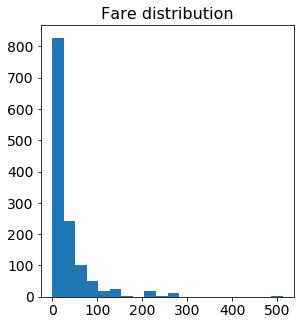

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df["Fare"], bins=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Fare distribution", fontsize=16)

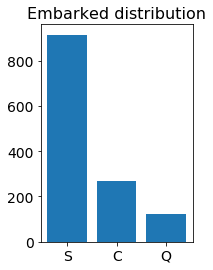

In [20]:

plt.subplot(1, 2, 2)
embarked_info = df["Embarked"].value_counts()
plt.bar(embarked_info.index, embarked_info.values)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Embarked distribution", fontsize=16);

In [22]:
##Working on the skweness
df["Embarked"].fillna("S", inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [29]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")

In [30]:
df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [26]:
Test_title = df["Name"].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [27]:
Test_title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [31]:
df["Title"] = df["Title"].replace(["Ms", "Mlle"], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")
df = df.drop(["Name"], axis=1)

In [32]:
df.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,male,1,0,A/5 21171,7.2500,S,Mr
1,1,female,1,0,PC 17599,71.2833,C,Mrs
2,3,female,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,female,1,0,113803,53.1000,S,Mrs
4,3,male,0,0,373450,8.0500,S,Mr


In [33]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0}).astype(int)    
df["Embarked"] = df["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)    
df['Title'] = df['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}).astype(int) 

In [38]:
df.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,TicketNumber
0,3,1,1,0,A/5 21171,7.2500,1,0,21171
1,1,0,1,0,PC 17599,71.2833,2,2,17599
2,3,0,0,0,STON/O2. 3101282,7.9250,1,1,3101282
3,1,0,1,0,113803,53.1000,1,2,113803
4,3,1,0,0,373450,8.0500,1,0,373450


In [ ]:
full_df["TicketNumber"] = full_df["Ticket"].str.split()
full_df["TicketNumber"] = full_df["TicketNumber"].str[-1]
full_df["TicketNumber"] = LabelEncoder().fit_transform(full_df["TicketNumber"])
full_df = full_df.drop(["Ticket"], axis=1)

In [35]:
df["TicketNumber"] = df["Ticket"].str.split()

In [37]:
df["TicketNumber"] = df["TicketNumber"].str[-1]

In [41]:
df["TicketNumber"] = LabelEncoder().fit_transform(df["TicketNumber"])

In [42]:
df.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,TicketNumber
0,3,1,1,0,A/5 21171,7.2500,1,0,209
1,1,0,1,0,PC 17599,71.2833,2,2,166
2,3,0,0,0,STON/O2. 3101282,7.9250,1,1,466
3,1,0,1,0,113803,53.1000,1,2,67
4,3,1,0,0,373450,8.0500,1,0,832


In [43]:
df = df.drop(["Ticket"], axis=1)

In [44]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,TicketNumber
0,3,1,1,0,7.2500,1,0,209
1,1,0,1,0,71.2833,2,2,166
2,3,0,0,0,7.9250,1,1,466
3,1,0,1,0,53.1000,1,2,67
4,3,1,0,0,8.0500,1,0,832


In [45]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [46]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,TicketNumber,FamilySize
0,3,1,1,0,7.2500,1,0,209,2
1,1,0,1,0,71.2833,2,2,166,2
2,3,0,0,0,7.9250,1,1,466,1
3,1,0,1,0,53.1000,1,2,67,2
4,3,1,0,0,8.0500,1,0,832,1


In [47]:
df["IsAlone"] = df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)

In [48]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,TicketNumber,FamilySize,IsAlone
0,3,1,1,0,7.2500,1,0,209,2,0
1,1,0,1,0,71.2833,2,2,166,2,0
2,3,0,0,0,7.9250,1,1,466,1,1
3,1,0,1,0,53.1000,1,2,67,2,0
4,3,1,0,0,8.0500,1,0,832,1,1


In [49]:
X_train = df[:y_train.shape[0]]
X_test = df[y_train.shape[0]:]

print(f"Train X shape: {X_train.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Train X shape: (891, 10)
Train y shape: (891,)
Test X shape: (418, 10)


In [50]:
#Let's create one-hot categorical representations and normalize numerical columns for the gradient-based models
one_hot_cols = ["Embarked", "Title"]
for col in one_hot_cols:
    df = pd.concat(
        [df, pd.get_dummies(df[col], prefix=col)], 
        axis=1, 
        join="inner",
    )
df = df.drop(one_hot_cols, axis=1)

In [51]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,TicketNumber,FamilySize,IsAlone,Embarked_1,Embarked_2,Embarked_3,Title_0,Title_1,Title_2,Title_3
0,3,1,1,0,7.2500,209,2,0,1,0,0,1,0,0,0
1,1,0,1,0,71.2833,166,2,0,0,1,0,0,0,1,0
2,3,0,0,0,7.9250,466,1,1,1,0,0,0,1,0,0
3,1,0,1,0,53.1000,67,2,0,1,0,0,0,0,1,0
4,3,1,0,0,8.0500,832,1,1,1,0,0,1,0,0,0


In [54]:
scaler = StandardScaler()
df.loc[:] = scaler.fit_transform(df)

In [55]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,TicketNumber,FamilySize,IsAlone,Embarked_1,Embarked_2,Embarked_3,Title_0,Title_1,Title_2,Title_3
0,0.841916,0.743497,0.481288,-0.445,-0.503595,-0.846179,0.073352,-1.233758,0.655011,-0.50977,-0.32204,0.819619,-0.502625,-0.425920,-0.221084
1,-1.546098,-1.344995,0.481288,-0.445,0.734503,-1.004578,0.073352,-1.233758,-1.526692,1.96167,-0.32204,-1.220079,-0.502625,2.347858,-0.221084
2,0.841916,-1.344995,-0.479087,-0.445,-0.490544,0.100529,-0.558346,0.810532,0.655011,-0.50977,-0.32204,-1.220079,1.989556,-0.425920,-0.221084
3,-1.546098,-1.344995,0.481288,-0.445,0.382925,-1.369263,0.073352,-1.233758,0.655011,-0.50977,-0.32204,-1.220079,-0.502625,2.347858,-0.221084
4,0.841916,0.743497,-0.479087,-0.445,-0.488127,1.448759,-0.558346,0.810532,0.655011,-0.50977,-0.32204,0.819619,-0.502625,-0.425920,-0.221084


In [57]:
X_train_norm = df[:y_train.shape[0]]
X_test_norm = df[y_train.shape[0]:]

print(f"Train norm X shape: {X_train_norm.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Test norm X shape: {X_test_norm.shape}")

Train norm X shape: (891, 15)
Train y shape: (891,)
Test norm X shape: (418, 15)


In [58]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,TicketNumber,FamilySize,IsAlone,Embarked_1,Embarked_2,Embarked_3,Title_0,Title_1,Title_2,Title_3
0,0.841916,0.743497,0.481288,-0.445,-0.503595,-0.846179,0.073352,-1.233758,0.655011,-0.50977,-0.32204,0.819619,-0.502625,-0.425920,-0.221084
1,-1.546098,-1.344995,0.481288,-0.445,0.734503,-1.004578,0.073352,-1.233758,-1.526692,1.96167,-0.32204,-1.220079,-0.502625,2.347858,-0.221084
2,0.841916,-1.344995,-0.479087,-0.445,-0.490544,0.100529,-0.558346,0.810532,0.655011,-0.50977,-0.32204,-1.220079,1.989556,-0.425920,-0.221084
3,-1.546098,-1.344995,0.481288,-0.445,0.382925,-1.369263,0.073352,-1.233758,0.655011,-0.50977,-0.32204,-1.220079,-0.502625,2.347858,-0.221084
4,0.841916,0.743497,-0.479087,-0.445,-0.488127,1.448759,-0.558346,0.810532,0.655011,-0.50977,-0.32204,0.819619,-0.502625,-0.425920,-0.221084


In [60]:
#Let's highlight categorical features in one list, since they may be needed for some models
categorical_columns = ['Sex', 'Embarked', 'Title', 'TicketNumber', 'IsAlone']

In [61]:
#Save mean cross-validated accuracy scores of best models
cross_valid_scores = {}

In [ ]:
#Decision Tree

In [80]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
print('-----')

-----
Best parameters {'max_depth': 11}
Mean cross-validated accuracy score of the best_estimator: 0.817
-----
Wall time: 155 ms


In [ ]:
#Random Forest

In [81]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
print('-----')

-----
Best parameters {'max_depth': 11, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.844
-----
Wall time: 8.61 s


In [84]:
#AdaBoost



parameters = {
    "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
}

model_adaboost = AdaBoostClassifier(
    random_state=SEED,
)

model_adaboost = GridSearchCV(
    model_adaboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_adaboost.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_adaboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_adaboost.best_score_:.3f}'
)
cross_valid_scores['ada_boost'] = model_adaboost.best_score_
print('-----')

-----
Best parameters {'learning_rate': 0.1, 'n_estimators': 50}
Mean cross-validated accuracy score of the best_estimator: 0.832
-----


In [ ]:
#XGBoost

%%time

parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=SEED,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')

In [ ]:
#LightGBM

%%time
parameters = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [7, 15, 31],
}

model_lgbm = lgbm.LGBMClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_lgbm = GridSearchCV(
    model_lgbm, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_lgbm.fit(
    X_train, 
    y_train, 
    categorical_feature=categorical_columns
)

print('-----')
print(f'Best parameters {model_lgbm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lgbm.best_score_:.3f}'
)
cross_valid_scores['lightgbm'] = model_lgbm.best_score_
print('-----')

In [ ]:
#CatBoost

%%time
parameters = {
    'iterations': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9, 11, 13],
}

model_catboost = cb.CatBoostClassifier(
    verbose=False,
)

model_catboost = GridSearchCV(
    model_catboost, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_catboost.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_catboost.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_catboost.best_score_:.3f}'
)
cross_valid_scores['catboost'] = model_catboost.best_score_
print('-----')

In [87]:
#Logistic Regression

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_logistic_regression = LogisticRegression(
    random_state=SEED,
    class_weight="balanced",
    solver="liblinear",
)

model_logistic_regression = GridSearchCV(
    model_logistic_regression, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_logistic_regression.fit(X_train_norm, y_train)

print('-----')
print(f'Best parameters {model_logistic_regression.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_logistic_regression.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_logistic_regression.best_score_
print('-----')


-----
Best parameters {'C': 0.01, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.801
-----


In [88]:
#SVC 

%%time

parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

model_svc = SVC(
    random_state=SEED,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train_norm, y_train)

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
print('-----')

-----
Best parameters {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Mean cross-validated accuracy score of the best_estimator: 0.827
-----
Wall time: 24.1 s


In [91]:
##K-Nearest Neighbors

%%time
parameters = {
    "weights": ["uniform", "distance"],
}

model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(X_train_norm, y_train)

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_

print('-----')

-----
Best parameters {'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.816
-----
Wall time: 170 ms


In [ ]:
#Submission

In [92]:
#Creating the data frame of the CV scores of the models for the data set

pd.DataFrame(cross_valid_scores, index=['cross_valid_score']).T


,cross_valid_score
desicion_tree,0.817061
random_forest,0.843990
ada_boost,0.831624
logistic_regression,0.801343
svc,0.827161
k_neighbors,0.815931


In [96]:
X_test.head()


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,TicketNumber,FamilySize,IsAlone
0,3,1,0,0,7.8292,3,0,541,1,1
1,3,0,1,0,7.0000,1,2,764,2,0
2,2,1,0,0,9.6875,3,0,287,1,1
3,3,1,0,0,8.6625,1,0,528,1,1
4,3,0,1,1,12.2875,1,2,482,3,0


In [101]:
X_test.iloc[:,1]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [103]:
def create_submission(model, X_test, test_passenger_id, model_name):
    y_pred_test = model.predict_proba(X_test)[:, 1]
    submission = pd.DataFrame(
        {
            'PassengerId': test_passenger_id, 
            'Survived': (y_pred_test >= 0.5).astype(int),
        }
    )
    submission.to_csv(f"submission_{model_name}.csv", index=False)
    
    return y_pred_test

In [107]:
test_pred_decision_tree = create_submission(
    model_desicion_tree, X_test, test_df["PassengerId"], "decision_tree"
)

In [110]:

test_pred_random_forest = create_submission(
    model_random_forest, X_test, test_df["PassengerId"], "random_forest"
)
"""
test_pred_adaboost = create_submission(
   model_adaboost, X_test, test_df["PassengerId"], "adaboost")
test_pred_xgboost = create_submission(
  model_xgb, X_test, test_df["PassengerId"], "xgboost"
)
test_pred_lightgbm = create_submission(
    model_lgbm, X_test, test_df["PassengerId"], "lightgbm"
)
test_pred_catboost = create_submission(
    model_catboost, X_test, test_df["PassengerId"], "catboost")
"""
test_pred_logistic_regression = create_submission(
    model_logistic_regression, X_test_norm, test_df["PassengerId"], "logistic_regression"
)
test_pred_svc = create_submission(
    model_svc, X_test_norm, test_df["PassengerId"], "svc"
)
test_pred_k_neighbors = create_submission(
    model_k_neighbors, X_test_norm, test_df["PassengerId"], "k_neighbors"
)

In [111]:

test_pred_merged = (
    test_pred_decision_tree + 
    test_pred_random_forest + 
    test_pred_logistic_regression + 
    test_pred_svc +
    test_pred_k_neighbors
)
test_pred_merged = np.round(test_pred_merged / 9)
submission = pd.DataFrame(
    {
        'PassengerId': test_df["PassengerId"], 
        'Survived': test_pred_merged.astype(int),
    }
)

In [112]:

submission.to_csv(f"submission_merged.csv", index=False)